# Финальный проект

Финальный проект на курсе по машинному обучению на курсере

В этом ноутбуке предлагается решать задачу предсказания средней цены квадратного метра жилья в некоторых районах Москвы и Московской области. В качестве метрики будем использовать MAPE.

MAPE (Mean Absolute Percentage Error) = $\dfrac{1}{\ell}\sum\limits_{i=1}^{\ell} \left| \dfrac{y_i - a(x_i)}{y_i} \right|$

## Импорт библиотек и чтение данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid', rc={'figure.figsize': (16, 8)})

pd.options.display.max_columns = 100

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

housebase = pd.read_csv('housebase.csv')

In [3]:
housebase = housebase.sample(10000, replace=False)

### train.csv и test.csv

Описание полей в файлах train.csv и test.csv:

**month** - месяц, за который указаны данные в датасете

**city_quadkey** - полигон, его координаты можно его узнать из скрипта quadkey.py

**apartment_ratio** - доля квартир в этом районе в этом месяце со статусом "апартаменты"

**offers_in_sites_ratio** - доля офферов в ЖК в этом районе в этом месяце

**studio_ratio** - доля объявлений о продаже студии среди всех объявлений в этом районе в этом месяце

**rooms_offered_*_ratio** - доля квартир указанной в * комнатности от всех квартир в продаже в этом районе в этом месяце

**unique_active_buildings_count** - количество домов, в которых есть квартиры в продаже в этом районе в этом месяце

**unique_active_building_series_count** - количество уникальных серий домов, в которых есть квартиры в продаже в этом районе в этом месяце

**total_area_avg** - средний метраж продаваемой квартиры в этом районе в этом месяце

**offer_count** - число объявлений о продаже квартир в этом районе в этом месяце

**avg_price_sqm** - средняя цена за квадратный метр в этом районе в этом месяце

### housebase.csv

Описание полей в датасете про базу домов housebase.csv:

**city_quadkey** - полигон, его координаты можно его узнать из скрипта quadkey.py

**building_id** - id дома

**building_series_id** - id серии дома

**unified_address** - адрес дома

**latitude, longitude** - координаты дома

**flats_count** - количество квартир в доме

**has_elevator** - наличие лифта в доме

**ceiling_height** - высота потолков в доме

**build_year** - год постройки дома

**expect_demolition** - дом входит в программу реновации и ожидает сноса

**art_cnt** - количество организаций в сфере искусства (музеи, галереи и т.п.) в этом районе city_quadkey

**beauty_cnt** - количество салонов красоты в этом районе city_quadkey

**cafe_restaurant_eating_out_cnt** - количество точек общественного питания в этом районе city_quadkey

**chain_cnt** - количество сетевых организаций в этом районе city_quadkey

**entertainment_cnt** - количество организаций в сфере развлечений в этом районе city_quadkey

**groceries_and_everyday_items_cnt** - количество продуктовых магазинов в этом районе city_quadkey

**healthcare_cnt** - количество организаций в сфере здравоохранения в этом районе city_quadkey

**laundry_and_repair_services_cnt** - количество прачечных и ремонтных мастерских в этом районе city_quadkey

**shopping_cnt** - количество магазинов в этом районе city_quadkey

**sport_cnt** - количество спортивных организаций в этом районе city_quadkey

In [4]:
train.head()

,month,city_quadkey,apartment_ratio,offers_in_sites_ratio,studio_ratio,rooms_offered_1_ratio,rooms_offered_2_ratio,rooms_offered_3_ratio,rooms_offered_4_more_ratio,total_area_avg,unique_active_buildings_count,unique_active_building_series_count,offer_count,avg_price_sqm,season
0,2017-09-01,120310101003320,0.0,0.0,0.000000,0.666667,0.000000,0.333333,0.000000,46.000000,1,1,3,109930.356771,fall
1,2018-02-01,120310102131112,0.0,0.0,0.000000,0.600000,0.200000,0.000000,0.200000,60.760000,4,2,5,75599.835938,winter
2,2018-10-01,120310121201212,0.0,0.0,0.047619,0.349206,0.428571,0.206349,0.015873,51.480952,13,2,63,48865.313027,fall
3,2017-09-01,120310101102202,0.0,0.0,0.000000,0.486486,0.243243,0.270270,0.000000,49.237838,15,8,37,155280.097128,fall
4,2017-01-01,120310101102301,0.0,0.0,0.000000,0.513514,0.324324,0.135135,0.027027,48.313513,15,8,37,157609.437711,winter


In [5]:
test.head()

,month,city_quadkey,apartment_ratio,offers_in_sites_ratio,studio_ratio,rooms_offered_1_ratio,rooms_offered_2_ratio,rooms_offered_3_ratio,rooms_offered_4_more_ratio,total_area_avg,unique_active_buildings_count,unique_active_building_series_count,offer_count,avg_price_sqm,season
0,2019-07-01,120310101312123,0.0,0.0,0.155556,0.288889,0.288889,0.400000,0.022222,57.248889,16,5,45,165260.927257,summer
1,2019-03-01,120310101021111,0.0,0.0,0.000000,0.142857,0.400000,0.400000,0.057143,58.271429,18,9,35,183111.316071,spring
2,2019-07-01,120310130131211,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,53.000000,1,1,1,33962.265625,summer
3,2019-03-01,120310101012003,0.0,0.0,0.002732,0.265027,0.333333,0.245902,0.153005,87.658033,20,3,366,118424.849983,spring
4,2019-01-01,120310101221032,0.0,0.0,0.000000,0.187500,0.625000,0.187500,0.000000,47.000000,8,4,16,145717.792480,winter


In [6]:
housebase.head(1)

,city_quadkey,building_id,building_series_id,building_type,unified_address,latitude,longitude,flats_count,has_elevator,ceiling_height,build_year,expect_demolition,art_cnt,beauty_cnt,cafe_restaurant_eating_out_cnt,chain_cnt,entertainment_cnt,groceries_and_everyday_items_cnt,healthcare_cnt,laundry_and_repair_services_cnt,shopping_cnt,sport_cnt
9984,120310131122202,2137625782024500323,0,NaN,"Россия, Московская область, Луховицы, Новый пр...",54.972519,39.0275,3,0,NaN,1996.0,0,NaN,1.0,NaN,1.0,1.0,2.0,1.0,NaN,1.0,NaN


In [7]:
f'Количество объектов в train {len(train)}, в test {len(test)}, количество записей в housebase {len(housebase)}.'

'Количество объектов в train 40000, в test 10000, количество записей в housebase 10000.'

## EDA

Посмотрим есть ли пропуски в данных:

In [8]:
train.isna().sum()

month                                  0
city_quadkey                           0
apartment_ratio                        0
offers_in_sites_ratio                  0
studio_ratio                           0
rooms_offered_1_ratio                  0
rooms_offered_2_ratio                  0
rooms_offered_3_ratio                  0
rooms_offered_4_more_ratio             0
total_area_avg                         0
unique_active_buildings_count          0
unique_active_building_series_count    0
offer_count                            0
avg_price_sqm                          0
season                                 0
dtype: int64

In [9]:
test.isna().sum()

month                                  0
city_quadkey                           0
apartment_ratio                        0
offers_in_sites_ratio                  0
studio_ratio                           0
rooms_offered_1_ratio                  0
rooms_offered_2_ratio                  0
rooms_offered_3_ratio                  0
rooms_offered_4_more_ratio             0
total_area_avg                         0
unique_active_buildings_count          0
unique_active_building_series_count    0
offer_count                            0
avg_price_sqm                          0
season                                 0
dtype: int64

In [10]:
housebase.isna().sum()

city_quadkey                           0
building_id                            0
building_series_id                     0
building_type                       1988
unified_address                        0
latitude                               0
longitude                              0
flats_count                            0
has_elevator                           0
ceiling_height                      5837
build_year                          2634
expect_demolition                      0
art_cnt                             2452
beauty_cnt                          2038
cafe_restaurant_eating_out_cnt      2519
chain_cnt                            634
entertainment_cnt                   1131
groceries_and_everyday_items_cnt     795
healthcare_cnt                      1708
laundry_and_repair_services_cnt     1208
shopping_cnt                        1756
sport_cnt                           1732
dtype: int64

Посмотрим на типы колонок:

In [11]:
train.dtypes

month                                   object
city_quadkey                             int64
apartment_ratio                        float64
offers_in_sites_ratio                  float64
studio_ratio                           float64
rooms_offered_1_ratio                  float64
rooms_offered_2_ratio                  float64
rooms_offered_3_ratio                  float64
rooms_offered_4_more_ratio             float64
total_area_avg                         float64
unique_active_buildings_count            int64
unique_active_building_series_count      int64
offer_count                              int64
avg_price_sqm                          float64
season                                  object
dtype: object

In [12]:
test.dtypes

month                                   object
city_quadkey                             int64
apartment_ratio                        float64
offers_in_sites_ratio                  float64
studio_ratio                           float64
rooms_offered_1_ratio                  float64
rooms_offered_2_ratio                  float64
rooms_offered_3_ratio                  float64
rooms_offered_4_more_ratio             float64
total_area_avg                         float64
unique_active_buildings_count            int64
unique_active_building_series_count      int64
offer_count                              int64
avg_price_sqm                          float64
season                                  object
dtype: object

In [13]:
housebase.dtypes

city_quadkey                          int64
building_id                           int64
building_series_id                    int64
building_type                        object
unified_address                      object
latitude                            float64
longitude                           float64
flats_count                           int64
has_elevator                          int64
ceiling_height                      float64
build_year                          float64
expect_demolition                     int64
art_cnt                             float64
beauty_cnt                          float64
cafe_restaurant_eating_out_cnt      float64
chain_cnt                           float64
entertainment_cnt                   float64
groceries_and_everyday_items_cnt    float64
healthcare_cnt                      float64
laundry_and_repair_services_cnt     float64
shopping_cnt                        float64
sport_cnt                           float64
dtype: object

Разделим признаки на несколько групп:

**-1:** `avg_price_sqm` (средняя цена, наша целевая переменная)

**0:** `city_quadkey`, `month` (район и месяц, для чего мы предсказываем)

**1:** `apartment_ratio`, `offers_in_sites_ratio`, `studio_ratio`, `rooms_offered_1_ratio`, `rooms_offered_2_ratio`, `rooms_offered_3_ratio`, `rooms_offered_4_more_ratio`, `total_area_avg` (описание объвлений на районе в этом месяце тип 1, из train)

**2:** `unique_active_buildings_count`, `unique_active_building_series_count`, `offer_count` (описание объявлений на районе в этом месяце тип 2, из train)

**3:** `beauty_cnt`, `shopping_cnt`, `cafe_restaurant_eating_out_cnt`, `entertainment_cnt`, `sport_cnt`, `chain_cnt`, `groceries_and_everyday_items_cnt`, `art_cnt`, `healthcare_cnt`, `laundry_and_repair_services_cnt` (описание района, из housebase)

**4:** `building_id`, `building_series_id`, `building_type`, `unified_address`, `flats_count`, `expect_demolition`, `ceiling_height`, `has_elevator`, `build_year` + `latitude`, `longitude` (описание дома, из housebase)

### Группа -1

Построим график распределения целевой переменной (`avg_price_sqm`). Здесь и далее будет использоваться функция hisplot() из библиотеки seaborn.

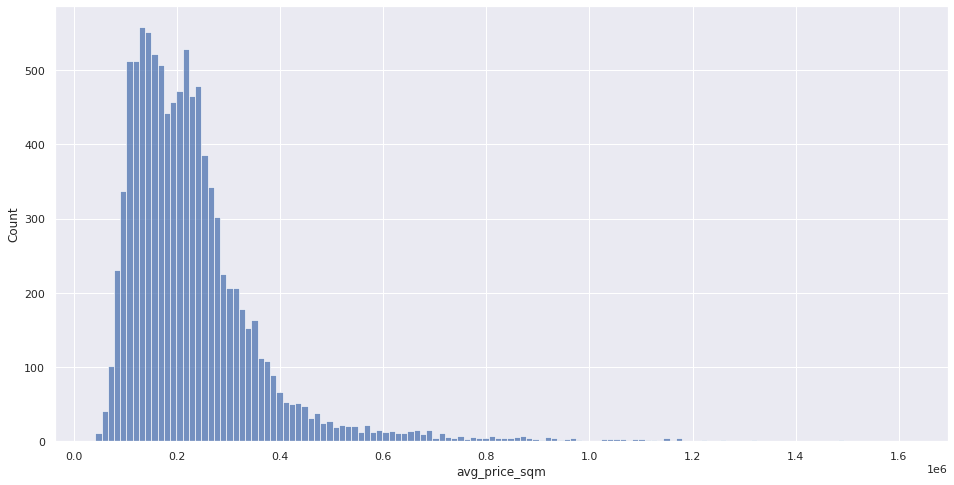

In [14]:
### YOUR CODE HERE
import seaborn as sns

sns.histplot(train['avg_price_sqm'] + test['avg_price_sqm'], kde=False, )
pass

### Группа 0

- Построим график распределения количества объявлений в зависимости от месяца для обучающей выборки.
- Посчитаем сколько уникальных районов представлено в датасете, в обучающей и тестовой выборке. Есть ли в тестовой выборке новые районы.

/home/eugen/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


new_quadkeys? -  True


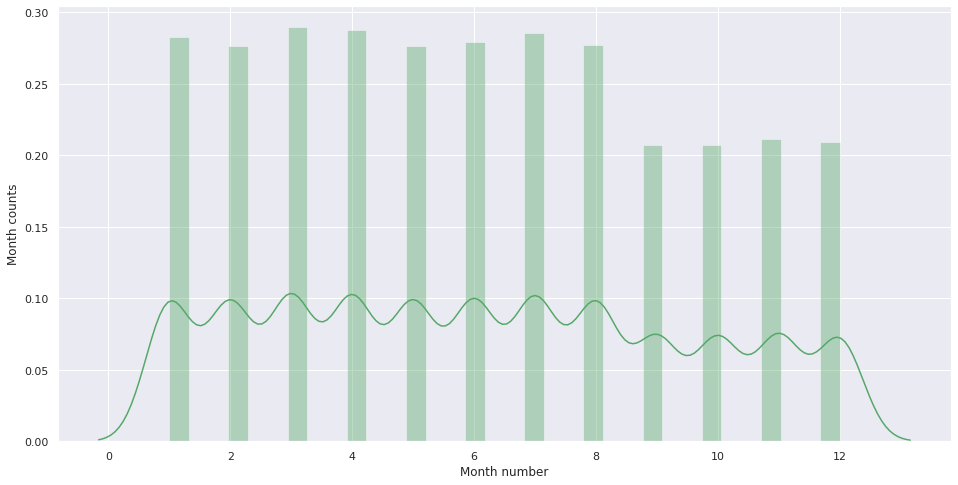

In [15]:
### YOUR CODE HERE
import matplotlib.pyplot as plt

#1
train_month_values = np.unique(train['month'])
test_month_values = np.unique(test['month'])
month_intersection = np.intersect1d(train_month_values, test_month_values)

#2
test_and_train = np.hstack((train['month'], test['month']))       # concatente test and train columns with 'month' feat.
only_month_list = [int(month[5:7]) for month in test_and_train]
sns.distplot(only_month_list, color='g')
plt.xlabel('Month number')
plt.ylabel('Month counts')

#3
train_quadkey_values = np.unique(train['city_quadkey'])
test_quadkey_values = np.unique(test['city_quadkey'])
city_quadkey_union = np.union1d(train_quadkey_values, test_quadkey_values)
new_quadkeys = True if len(city_quadkey_union) > len(train_quadkey_values) else False
print('new_quadkeys? - ', new_quadkeys)

Запишем в переменные (`train_nunique_month` и `train_nunique_quadkey`) количество уникальных значений в обучающей выборке для признаков `month` и `city_quadkey`.

In [16]:
# your code here
train_nunique_month = train['month'].nunique()
train_nunique_quadkey = train['city_quadkey'].nunique()
train_nunique_month, train_nunique_quadkey

(24, 6326)

### Группа 1

Для каждого признака построим график распределения. Проверим есть ли какие-то неинформативные признаки, которые можно сразу выбросить.

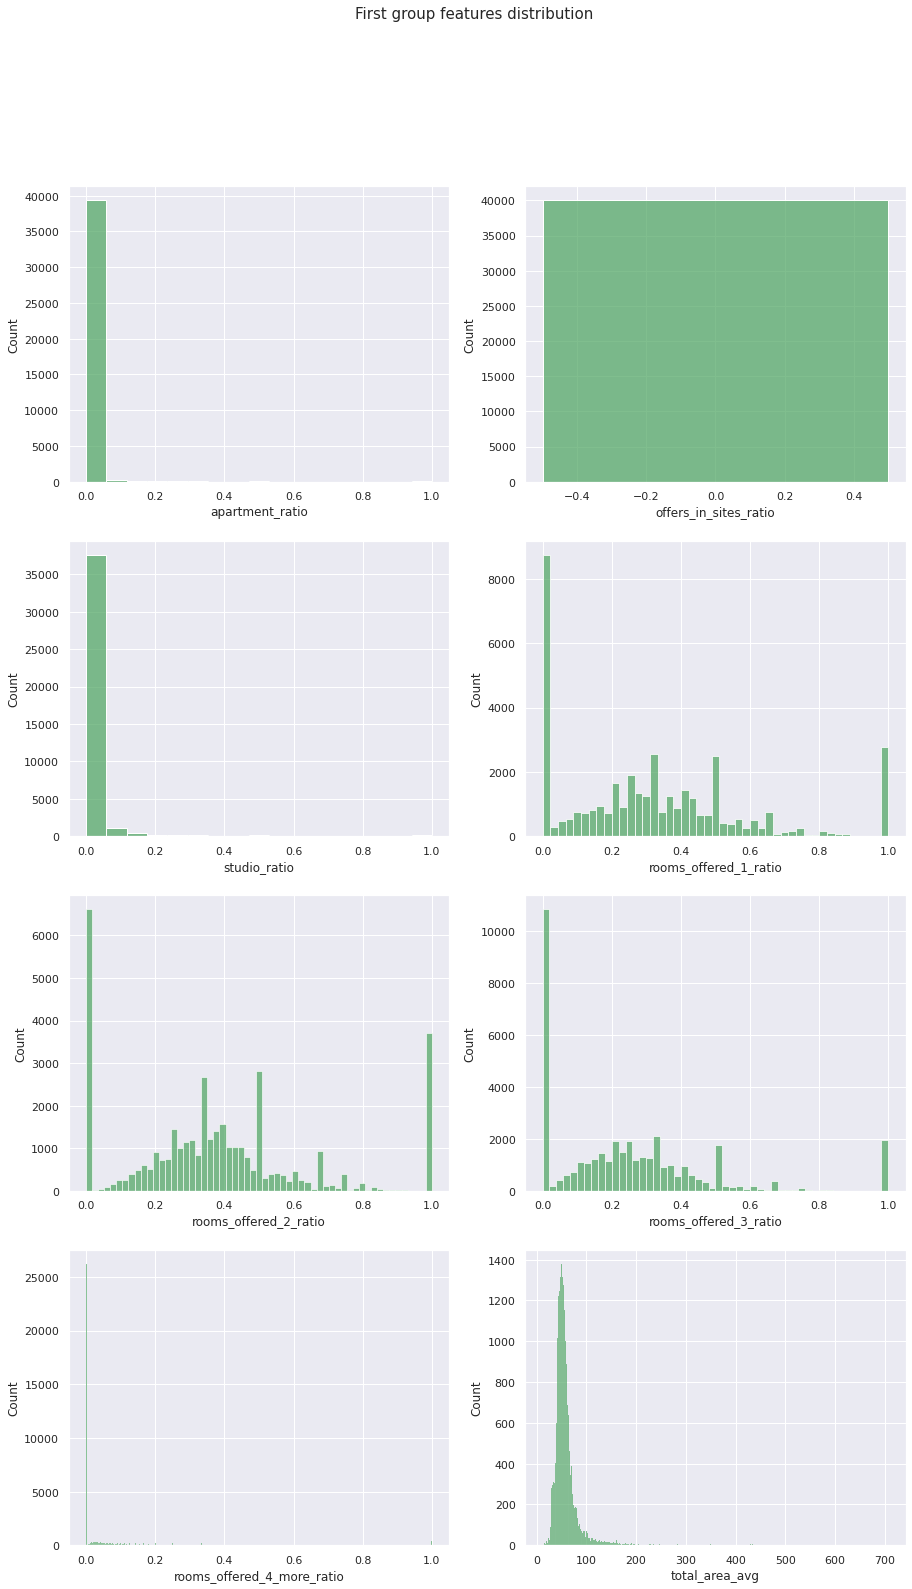

In [17]:
### FEATURES:
### apartment_ratio, offers_in_sites_ratio,
### studio_ratio, rooms_offered_1_ratio, rooms_offered_2_ratio,
### rooms_offered_3_ratio, rooms_offered_4_more_ratio, total_area_avg
### (описание объвлений на районе в этом месяце тип 1, из train)

features_selected_group_1 = ['apartment_ratio', 'offers_in_sites_ratio',
                             'studio_ratio', 'rooms_offered_1_ratio',
                             'rooms_offered_2_ratio', 'rooms_offered_3_ratio',
                             'rooms_offered_4_more_ratio', 'total_area_avg']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))
fig.suptitle('First group features distribution', fontsize=15)

feature_index = 0
for axes_row in axes:
    for axis in axes_row:
        feature_name = features_selected_group_1[feature_index]
        sns.histplot(train[feature_name], color='g', ax=axis)#, name=feature_name)
        feature_index += 1

Запишем в переменную `unwanted_cols` список с признаком, который можно будет удалить.

In [18]:
### As we see the 'offers_in_sites_ratio' feature
### has only one value in this dataset - 
### We can delete this feature

print(len(np.unique(train['offers_in_sites_ratio'])))

unwanted_cols = ['offers_in_sites_ratio']

1


### Группа 2

Для каждого признака построим график распределения.

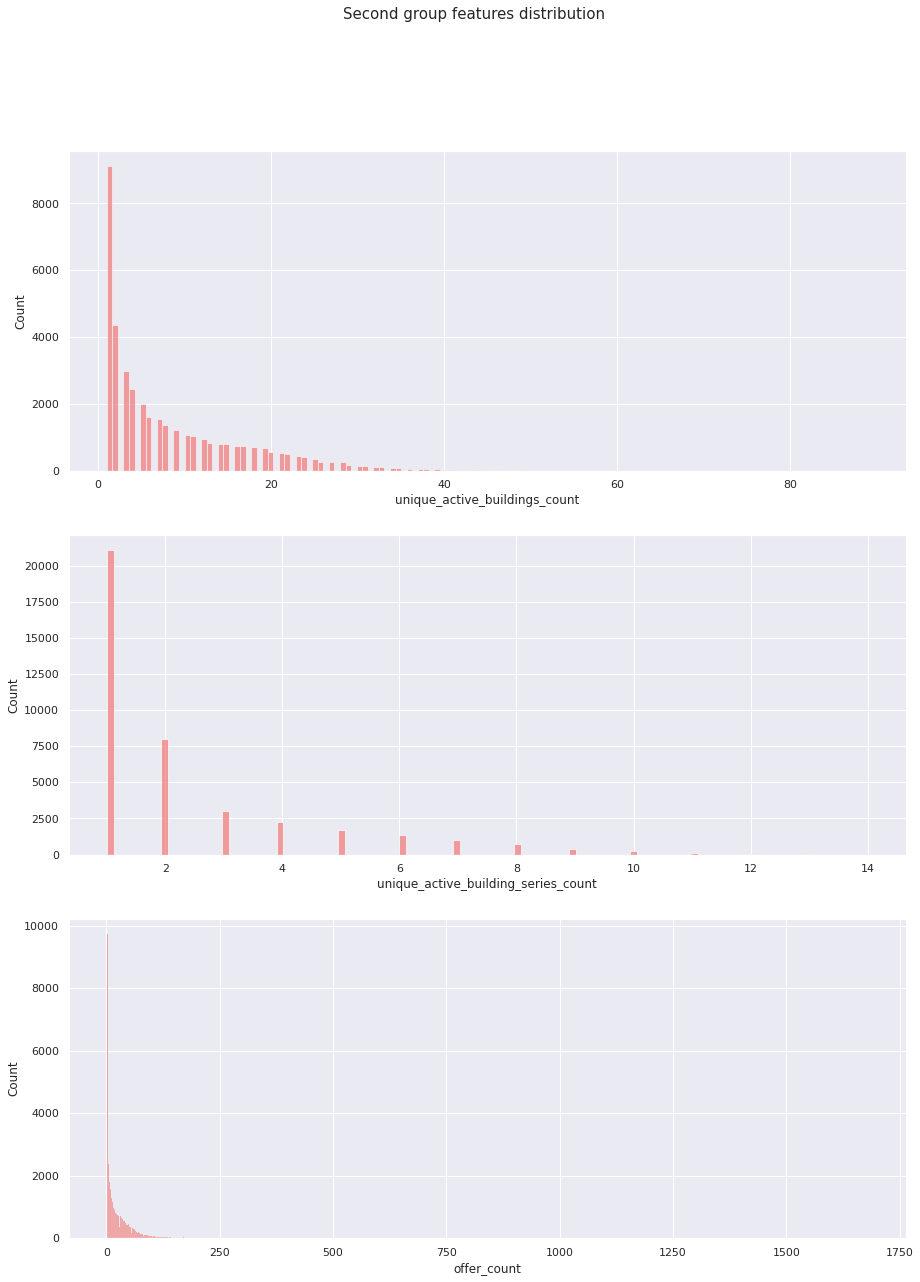

In [19]:

features_selected_group_2 = ['unique_active_buildings_count', 
                             'unique_active_building_series_count', 
                             'offer_count']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))
fig.suptitle('Second group features distribution', fontsize=15)

feature_index = 0
for axis in axes:
    feature_name = features_selected_group_2[feature_index]
    sns.histplot(train[feature_name], color='lightcoral', ax=axis)
    feature_index += 1

### Группа 3

Для каждого признака построим график распределения. 

Так как в этой группе признаки содержат информацию про количество тех или иных объектов на районе, физический смысл отсутствия информации - на районе нет таких объектов. В дальнейшем мы воспользуемся этой идеей для заполнения пропусков.

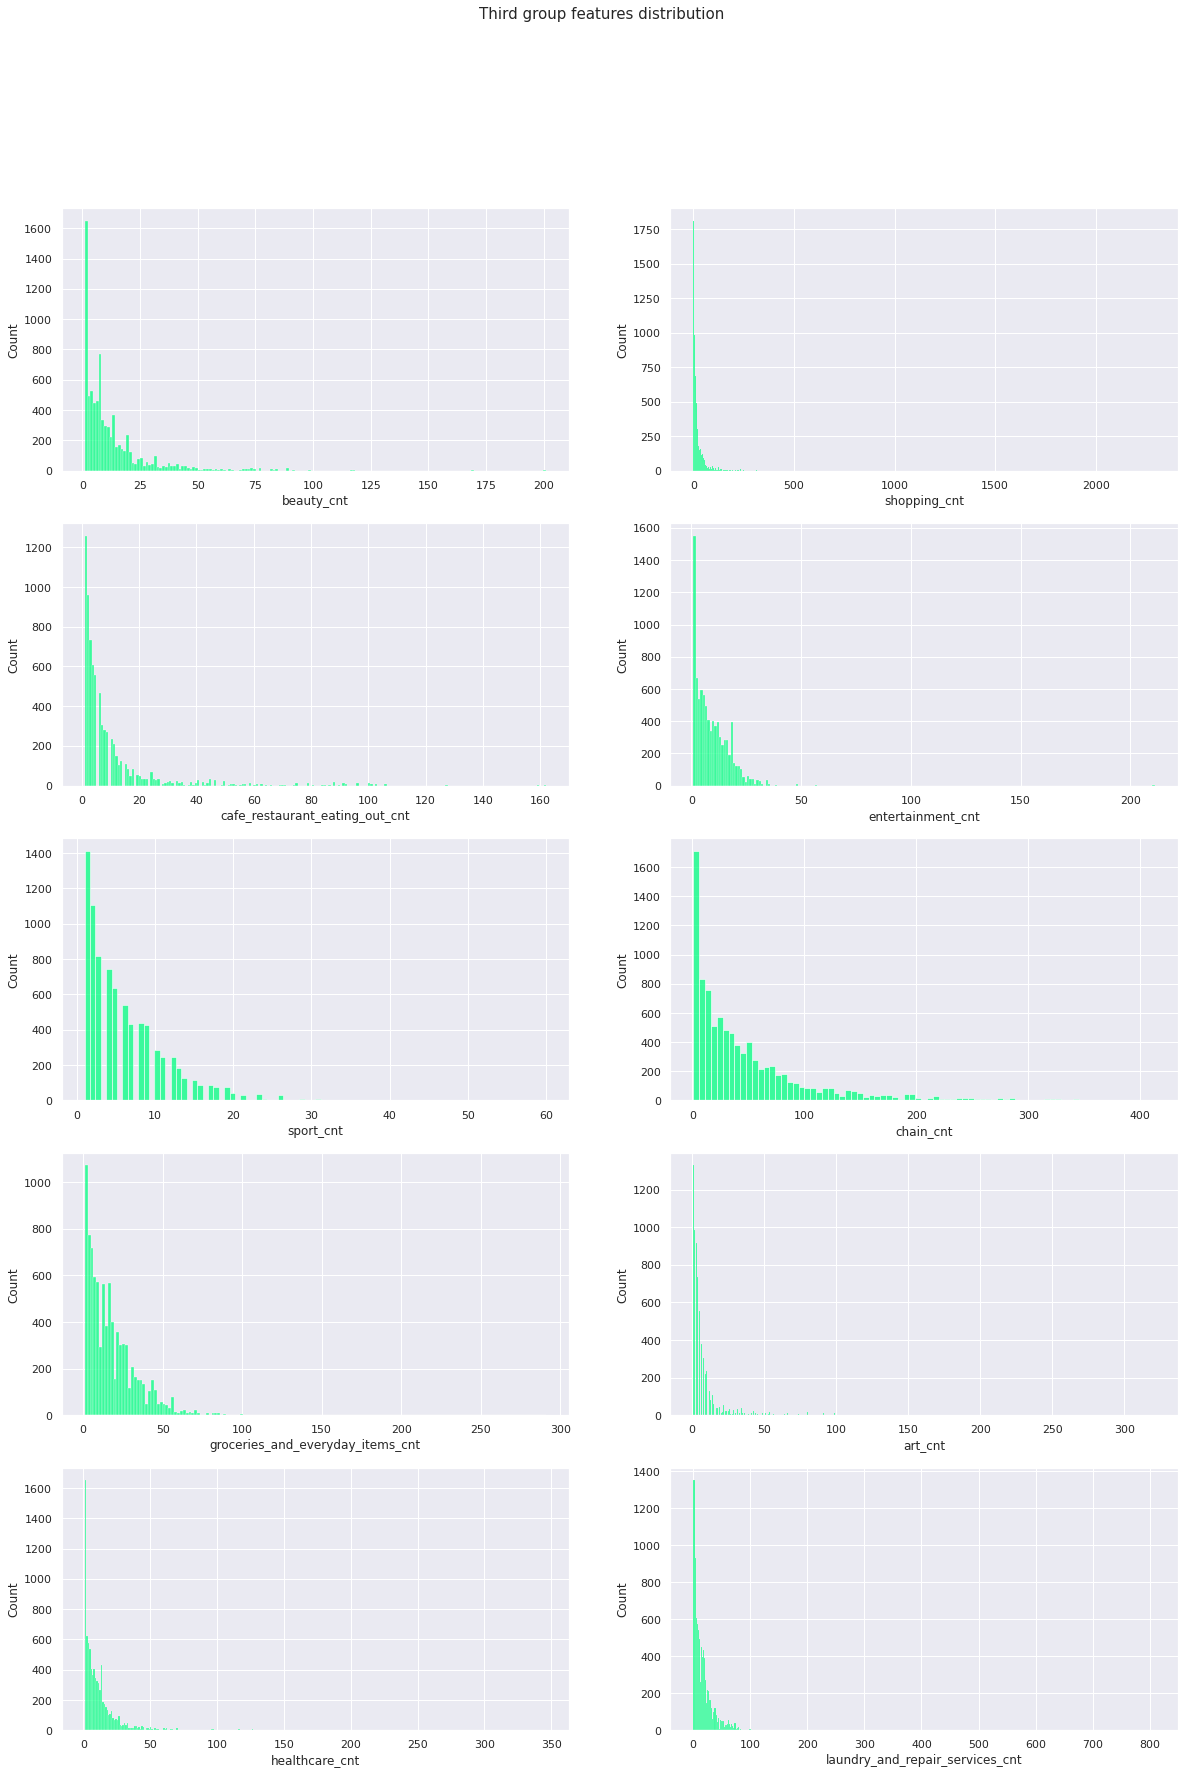

In [20]:
### beauty_cnt, shopping_cnt, cafe_restaurant_eating_out_cnt,
### entertainment_cnt, sport_cnt, chain_cnt, groceries_and_everyday_items_cnt,
### art_cnt, healthcare_cnt, laundry_and_repair_services_cnt (описание района, из housebase)

features_selected_group_3 = ['beauty_cnt', 'shopping_cnt', 'cafe_restaurant_eating_out_cnt',
                           'entertainment_cnt', 'sport_cnt', 'chain_cnt',
                           'groceries_and_everyday_items_cnt', 'art_cnt', 'healthcare_cnt', 
                           'laundry_and_repair_services_cnt']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 28))
fig.suptitle('Third group features distribution', fontsize=15)

feature_index = 0
for axis_row in axes:
    for axis in axis_row:
        feature_name = features_selected_group_3[feature_index]
        sns.histplot(housebase[feature_name], color='springgreen', ax=axis)
        feature_index += 1

### Группа 4

- Построим график распределения для  `building_id`.
- Построим графики распределения для `building_series_id` и `building_type`.
- Построим графики распределения для `flats_count`, `ceiling_height` и `build_year`.
- Построим графики распределения для `has_elevator` и `expect_demolition`.

Выберем какие множества признаков, из указанных выше, нужно отнести к категориальным, какие к вещественным, а какое удалить. Признаки для удаления добавим в `unwanted_cols`.


Признаки `latitude` и `longitude` пока счаитаем вещественными признаками.



/home/eugen/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


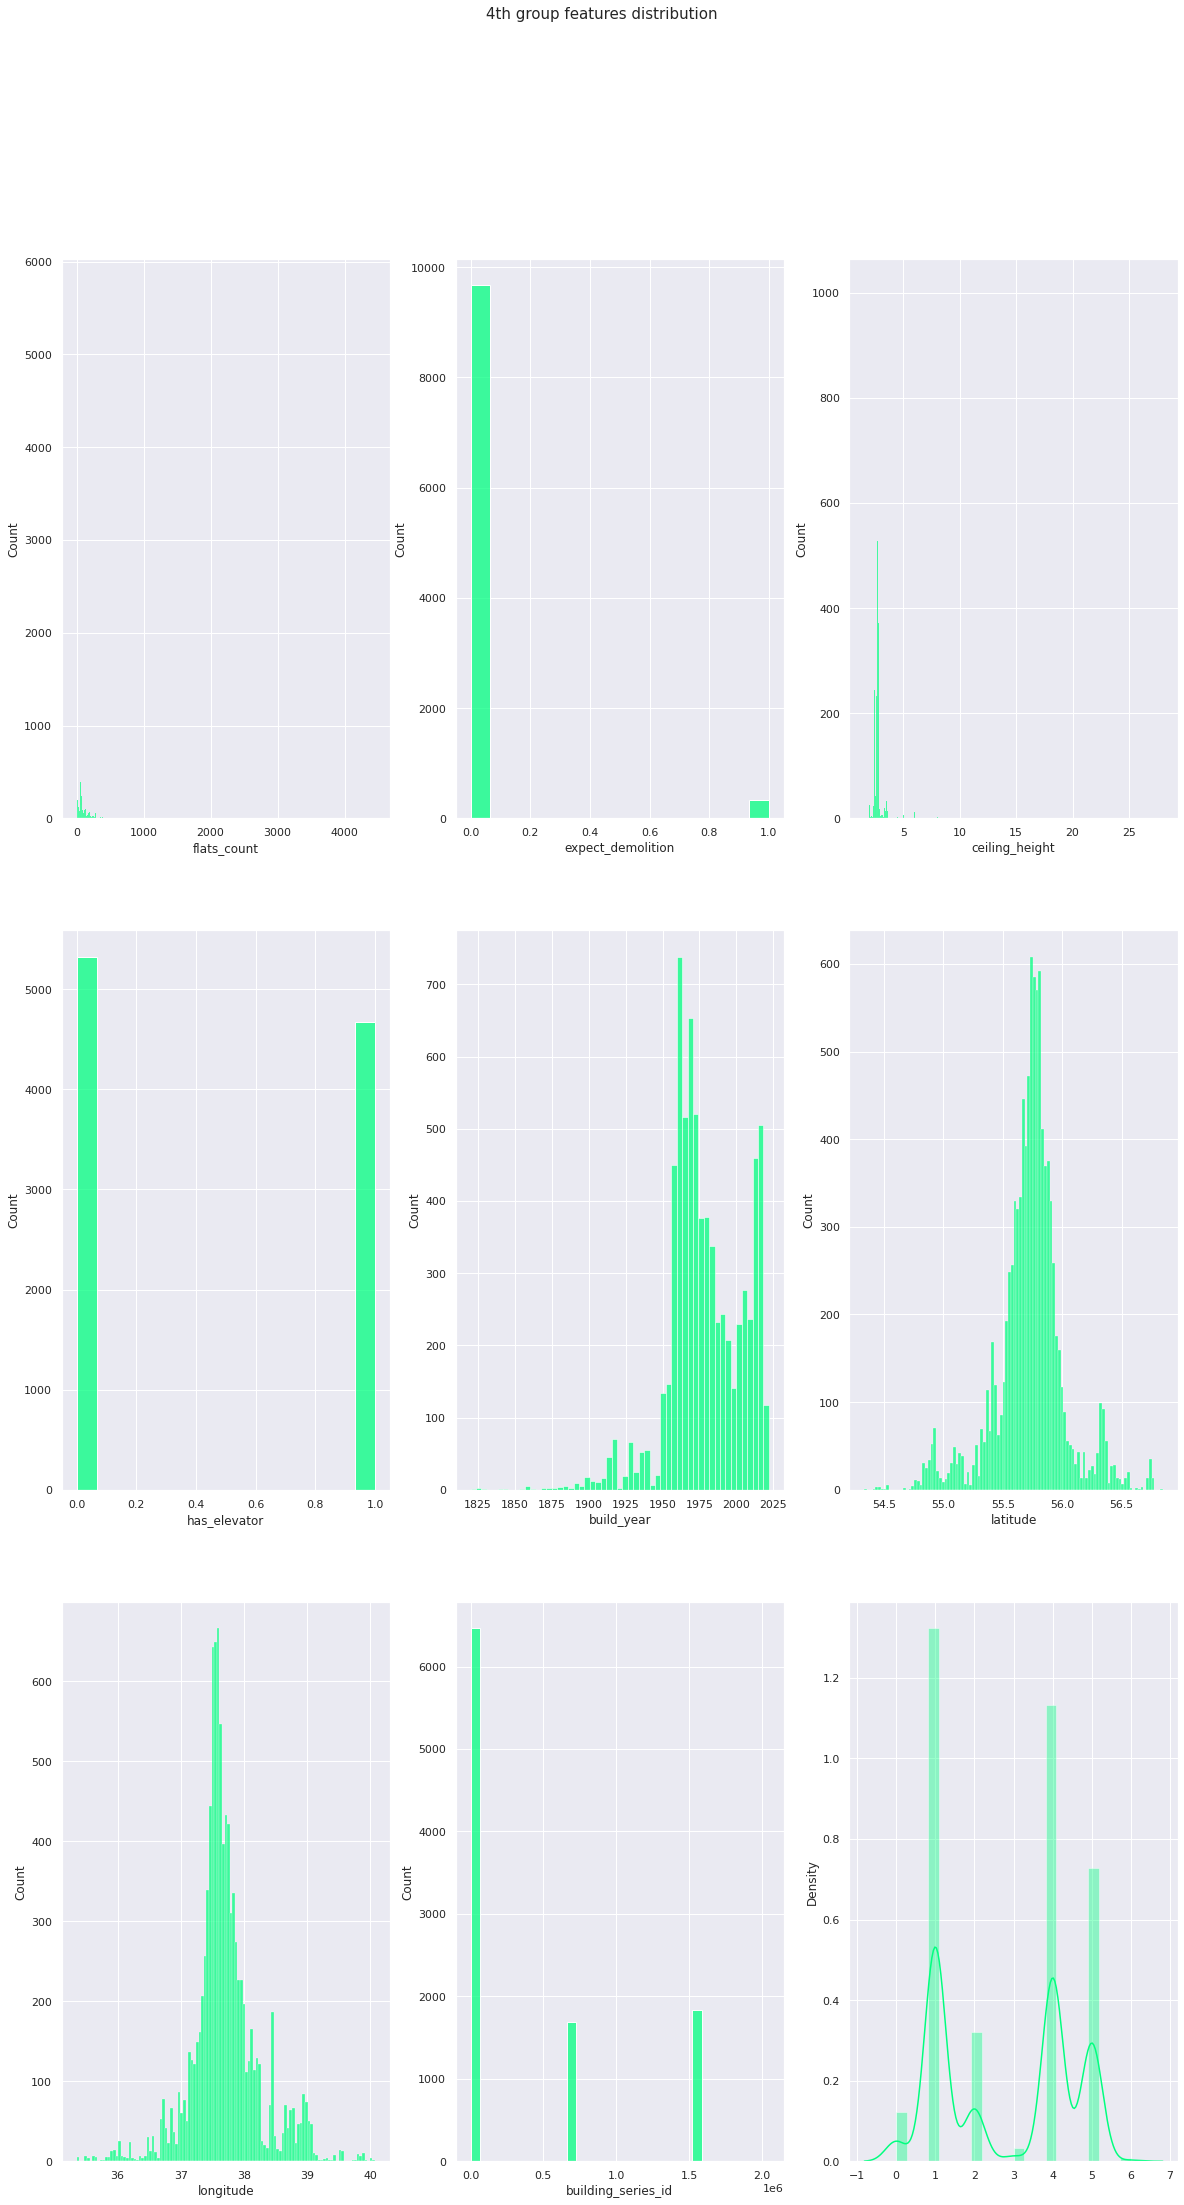

In [21]:
### building_id, building_series_id,
### building_type, unified_address, 
### flats_count, expect_demolition,
### ceiling_height, has_elevator, build_year + latitude, longitude
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
column_for_graphics = housebase['building_type'].fillna('Unknown')
column_for_graphics = enc.fit_transform(column_for_graphics)

features_selected_group_4 = ['flats_count', 'expect_demolition',
                             'ceiling_height', 'has_elevator', 
                             'build_year', 'latitude', 'longitude',
                            'building_series_id']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 35))
fig.suptitle('4th group features distribution', fontsize=15)


feature_index = 0
for axis_row in axes:
    for axis in axis_row:
        if feature_index == 8:
            sns.distplot(column_for_graphics, color='springgreen', ax=axis)
            break
        feature_name = features_selected_group_4[feature_index]
        sns.histplot(housebase[feature_name], color='springgreen', ax=axis)
        feature_index += 1

unwanted_cols += ['building_id']

### Деление на категориальные и вещественные

Учитывая

- Вывод функции dtypes
- Ваши выводы из графиков по группе 4
- Список `unwated_cols` (их не включайте)

Выделим все категориальные признаки, запишем их в переменные `cat_features`. Также мы проверим список `unwanted_cols`. Все остальные признаки занесём в список `real_features`. **Признак `city_quadkey` и целевую переменную `avg_price_sqm` никуда не вносите.**

In [22]:
# your code here

cat_features_from_train = ['season', 'month']
cat_features_from_housebase = list(housebase.columns[2:5]) + ['has_elevator', 'expect_demolition'] 

real_features_from_train = ['apartment_ratio'] + list(train.columns[4:-2])
real_features_from_housebase = list(housebase.columns[6:8]) + list(housebase.columns[9:11]) + list(housebase.columns[12:])

cat_features = cat_features_from_train + cat_features_from_housebase
real_features = real_features_from_train + real_features_from_housebase
cat_features

['season',
 'month',
 'building_series_id',
 'building_type',
 'unified_address',
 'has_elevator',
 'expect_demolition']

## Генерация признаков

Сгенерируем несколько новых признаков, разделим их на несколько групп:

- Отсутствие информации про район/дом
- Находится ли дом в Москве
- Расстояние до центра города
- Находится ли дом внутри колец
- Время года


### Отсутствие информации про район/дом

Вспомним признаки из группы 3 и группы 4, для **каждого** признака сделаем бинарный признак, который будет обозначать, что информация отсутствует, назовите их `col_name + '_isna'`. Создавать новые признаки стоит в `housebase`. Не будем создавать признаки для `unwanted_cols`.
Заполним пропуски: для категориальных новым значением `UNKNOWN`, для вещественных нулём.

In [23]:
len(real_features), len(cat_features)

(24, 7)

In [24]:
# your code here

features_to_add = real_features + cat_features + ['building_id']
features_to_add = np.intersect1d(list(housebase.columns), features_to_add)

for feature in features_to_add:
    housebase[feature + '_isna'] = housebase[feature].isna().astype(int)
    if feature in cat_features:
        #create new binary column 
        housebase[feature] = housebase[feature].fillna('UNKNOWN')
        cat_features.append(feature + '_isna')
    else:
        #create new binary column 
        housebase[feature] = housebase[feature].fillna(0)
        cat_features += [feature + '_isna']
        


### Находится ли дом в Москве

Сделаем новый бинарный признак, который будет обозначать находится ли дом в Москве, назовите его `is_in_Moscow`. Для этого стоит анализировать уже имеющийся признак `unified_address`. Добавим новый признак в соответствующий список.

In [25]:
# your code here
print(housebase.unified_address)
new_column = housebase['unified_address'].map(lambda x: True if 'Москва' in x else False).astype(int)
housebase['is_in_Moscow'] = new_column
cat_features.append('is_in_Moscow')

9984    Россия, Московская область, Луховицы, Новый пр...
6885    Россия, Московская область, Егорьевск, 4-й мик...
2350    Россия, Московская область, Сергиево-Посадский...
3878              Россия, Москва, Измайловская площадь, 4
6854           Россия, Москва, Шереметьевская улица, 37к2
                              ...                        
1836         Россия, Москва, Старая Басманная улица, 12с1
8924    Россия, Московская область, Воскресенск, Рабоч...
7378    Россия, Московская область, Балашиха, квартал ...
7037    Россия, Московская область, Подольск, Парковая...
2455    Россия, Московская область, Истра, микрорайон ...
Name: unified_address, Length: 10000, dtype: object


### Расстояние до центра города

Создадим новый вещественный признак, который будет равен расстоянию (по формуле haversine) от дома до Кремля, назовём его `center_dist`. Координаты Кремля: (55.7528, 37.6178).

In [26]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371.0088 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r


In [27]:
# your code here

center_moscow = [55.7528, 37.6178]

coordinates = housebase[['latitude', 'longitude']].to_numpy()
new_column_center_dist = pd.Series([haversine(coord[1], coord[0],
                                              center_moscow[1], center_moscow[0]) for coord in coordinates])
housebase['center_dist'] = new_column_center_dist
real_features.append('center_dist')

### Находится ли дом внутри колец

Создадим три новых бинарных признака - находится ли дом внутри Бульварного, Садового или Третьего Транспортного Кольца. Для этого стоит сравнить уже полученное расстояние до Кремля с 1.5, 3 и 6 километрами, соответственно. Назовите их `ring_1`, `ring_2` и `ring_3` соответственно.

In [28]:
# your code here
housebase['ring_1'] = (housebase['center_dist'] < 1.5).astype(int)
housebase['ring_2'] = (housebase['center_dist'] < 3.).astype(int)
housebase['ring_3'] = (housebase['center_dist'] < 6.).astype(int)
cat_features += ['ring_1', 'ring_2', 'ring_3']



In [29]:
len(cat_features)

31

## Подготовка данных для обучения

Теперь нам надо объединить обе таблички, чтобы добавить информацию про дома для каждого района. Перед тем как объединять таблички нам нужно будет создать для каждого района образ "среднего" дома по району.

Для этого мы для каждого категориального признака возьмем моду, для каждого вещественного медиану.

In [30]:

real_housebase = np.intersect1d(real_features, housebase.columns)
cat_housebase = np.intersect1d(cat_features, housebase.columns)


def combine_housebase(quadkeys_):
    groups = housebase.loc[housebase['city_quadkey'].isin(quadkeys_)].groupby('city_quadkey',  as_index=False)
    aggs = {}
    for c in cat_housebase: aggs[c] = 'count'
    for c in real_housebase: aggs[c] = 'median'
    return groups.agg(aggs).reset_index(drop=False)


In [31]:
housebase = combine_housebase(housebase['city_quadkey'].unique())

In [32]:
def fix_multiple_modes(x):
    if isinstance(x, (list, tuple, np.ndarray)):
        return x[0]
    return x

housebase['building_type'] = housebase['building_type'].apply(fix_multiple_modes)

In [33]:
train_data = train.join(housebase.set_index('city_quadkey'), on='city_quadkey', how='left')
test_data = test.join(housebase.set_index('city_quadkey'), on='city_quadkey', how='left')

train_data.dropna(inplace=True, axis=0)
test_data.dropna(inplace=True, axis=0)

In [34]:
train_data['building_type'] = train_data['building_type'].astype(str)
test_data['building_type'] = test_data['building_type'].astype(str)

Добавим еще один вещественный признак - возраст дома.

In [35]:
train_data['build_year'] = train_data['month'].str.split('-').map(lambda x: x[0]).astype(int) - train_data['build_year']
test_data['build_year'] = test_data['month'].str.split('-').map(lambda x: x[0]).astype(int) - test_data['build_year']

Разделим данные на признаки и целевую переменную.

In [36]:
x_train, y_train = train_data.drop(['avg_price_sqm'], axis=1), train_data[['avg_price_sqm']].values.ravel()
x_test, y_test = test_data.drop(['avg_price_sqm'], axis=1), test_data[['avg_price_sqm']].values.ravel()

В качестве бейзлайна возьмем значение нашей метрики (MAPE) для медианы обучающей выборки:

In [37]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [38]:
y_dummy = np.median(y_train)

f'MAPE baseline: TRAIN {mape(y_train, y_dummy):.2f}, TEST {mape(y_test, y_dummy):.2f}'

'MAPE baseline: TRAIN 50.38, TEST 51.73'

## Перебор гиперпараметров

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

In [40]:
cat_housebase = x_train.select_dtypes(include='object').columns
real_housebase = x_train.select_dtypes(exclude='object').columns

In [41]:
cat_housebase

Index(['month', 'season', 'building_type'], dtype='object')

In [42]:
x_train = pd.get_dummies(x_train, columns=['season'])
x_test = pd.get_dummies(x_test, columns=['season'])
x_train.head()

,month,city_quadkey,apartment_ratio,offers_in_sites_ratio,studio_ratio,rooms_offered_1_ratio,rooms_offered_2_ratio,rooms_offered_3_ratio,rooms_offered_4_more_ratio,total_area_avg,unique_active_buildings_count,unique_active_building_series_count,offer_count,index,art_cnt_isna,beauty_cnt_isna,build_year_isna,building_id_isna,building_series_id,building_series_id_isna,building_type,building_type_isna,cafe_restaurant_eating_out_cnt_isna,ceiling_height_isna,chain_cnt_isna,entertainment_cnt_isna,expect_demolition,expect_demolition_isna,flats_count_isna,groceries_and_everyday_items_cnt_isna,has_elevator,has_elevator_isna,healthcare_cnt_isna,is_in_Moscow,laundry_and_repair_services_cnt_isna,longitude_isna,ring_1,ring_2,ring_3,shopping_cnt_isna,sport_cnt_isna,unified_address,unified_address_isna,art_cnt,beauty_cnt,build_year,cafe_restaurant_eating_out_cnt,ceiling_height,center_dist,chain_cnt,entertainment_cnt,flats_count,groceries_and_everyday_items_cnt,healthcare_cnt,laundry_and_repair_services_cnt,longitude,shopping_cnt,sport_cnt,season_fall,season_spring,season_summer,season_winter
0,2017-09-01,120310101003320,0.0,0.0,0.000000,0.666667,0.000000,0.333333,0.000000,46.000000,1,1,3,1011.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,5.0,0.5,5.0,1.35,51.861060,22.0,1.0,735.0,7.0,1.0,2.0,37.398581,12.0,2.0,1,0,0,0
1,2018-02-01,120310102131112,0.0,0.0,0.000000,0.600000,0.200000,0.000000,0.200000,60.760000,4,2,5,2759.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,11.0,0.0,3.00,39.168148,2.0,2.0,33.0,2.0,0.0,1.0,37.245106,1.0,2.0,0,0,0,1
2,2018-10-01,120310121201212,0.0,0.0,0.047619,0.349206,0.428571,0.206349,0.015873,51.480952,13,2,63,3769.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,1.0,70.0,0.0,0.00,48.694889,5.0,1.0,26.0,11.0,12.0,1.0,37.380466,4.0,0.0,1,0,0,0
3,2017-09-01,120310101102202,0.0,0.0,0.000000,0.486486,0.243243,0.270270,0.000000,49.237838,15,8,37,1475.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,5.0,38.0,2.0,1.35,25.995043,16.0,9.0,171.5,7.0,1.0,6.0,37.625065,2.0,7.0,1,0,0,0
4,2017-01-01,120310101102301,0.0,0.0,0.000000,0.513514,0.324324,0.135135,0.027027,48.313513,15,8,37,1488.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,39.5,1.0,1.50,16.558161,18.0,4.0,80.0,5.0,5.0,15.0,37.676758,2.0,5.0,0,0,0,1


In [43]:
#date_format_train = pd.to_datetime(x_train.month)
#date_format_test = pd.to_datetime(x_test.month)
#x_train['year'] = date_format_train.dt.year
#x_test['year'] = date_format_test.dt.year
x_train.drop(['month'], axis='columns', inplace=True)
x_test.drop(['month'], axis='columns', inplace=True)
x_test['season_fall'] = np.zeros(shape=(6797))
x_train.head()

,city_quadkey,apartment_ratio,offers_in_sites_ratio,studio_ratio,rooms_offered_1_ratio,rooms_offered_2_ratio,rooms_offered_3_ratio,rooms_offered_4_more_ratio,total_area_avg,unique_active_buildings_count,unique_active_building_series_count,offer_count,index,art_cnt_isna,beauty_cnt_isna,build_year_isna,building_id_isna,building_series_id,building_series_id_isna,building_type,building_type_isna,cafe_restaurant_eating_out_cnt_isna,ceiling_height_isna,chain_cnt_isna,entertainment_cnt_isna,expect_demolition,expect_demolition_isna,flats_count_isna,groceries_and_everyday_items_cnt_isna,has_elevator,has_elevator_isna,healthcare_cnt_isna,is_in_Moscow,laundry_and_repair_services_cnt_isna,longitude_isna,ring_1,ring_2,ring_3,shopping_cnt_isna,sport_cnt_isna,unified_address,unified_address_isna,art_cnt,beauty_cnt,build_year,cafe_restaurant_eating_out_cnt,ceiling_height,center_dist,chain_cnt,entertainment_cnt,flats_count,groceries_and_everyday_items_cnt,healthcare_cnt,laundry_and_repair_services_cnt,longitude,shopping_cnt,sport_cnt,season_fall,season_spring,season_summer,season_winter
0,120310101003320,0.0,0.0,0.000000,0.666667,0.000000,0.333333,0.000000,46.000000,1,1,3,1011.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,5.0,0.5,5.0,1.35,51.861060,22.0,1.0,735.0,7.0,1.0,2.0,37.398581,12.0,2.0,1,0,0,0
1,120310102131112,0.0,0.0,0.000000,0.600000,0.200000,0.000000,0.200000,60.760000,4,2,5,2759.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,11.0,0.0,3.00,39.168148,2.0,2.0,33.0,2.0,0.0,1.0,37.245106,1.0,2.0,0,0,0,1
2,120310121201212,0.0,0.0,0.047619,0.349206,0.428571,0.206349,0.015873,51.480952,13,2,63,3769.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,1.0,70.0,0.0,0.00,48.694889,5.0,1.0,26.0,11.0,12.0,1.0,37.380466,4.0,0.0,1,0,0,0
3,120310101102202,0.0,0.0,0.000000,0.486486,0.243243,0.270270,0.000000,49.237838,15,8,37,1475.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,5.0,38.0,2.0,1.35,25.995043,16.0,9.0,171.5,7.0,1.0,6.0,37.625065,2.0,7.0,1,0,0,0
4,120310101102301,0.0,0.0,0.000000,0.513514,0.324324,0.135135,0.027027,48.313513,15,8,37,1488.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,39.5,1.0,1.50,16.558161,18.0,4.0,80.0,5.0,5.0,15.0,37.676758,2.0,5.0,0,0,0,1


In [44]:
x_test.shape

(6797, 61)

In [45]:
from sklearn.metrics import make_scorer


scorer = make_scorer(mape, greater_is_better=False)

lb = LabelEncoder().fit(x_train['building_type'].values)

x_train['building_type'] = lb.transform(x_train['building_type'].values)
x_test['building_type'] = lb.transform(x_test['building_type'].values)


def hyperopt(estimator, params):
    
    grid = GridSearchCV(
        estimator=estimator,
        param_grid=params,
        scoring=scorer,
        cv=3
    )
    
    grid.fit(x_train, y_train)
    
    # write best params to `best_params`
    # your code here
    best_params = grid.best_params_
    best_model = grid.best_estimator_
    
    best_model.fit(x_train, y_train)
    
    score_train = mape(y_train, best_model.predict(x_train))
    score_test = mape(y_test, best_model.predict(x_test))
    
    return score_train, score_test, best_params

## Сравнение моделей

Подберём для каждой из следующих моделей лучшие гиперпараметры **с помощью функции, которую вы написали выше.**

- Линейная модель с l2 регуляризацией
- Решающее дерево
- Случайный лес
- Градиентный бустинг
- Метод ближайших соседей

### Линейная модель с l2 регуляризацией

Попробуем исследовать влияние `alpha` и `max_iter` на результат.

In [46]:
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')

model = Ridge()
params = {
    'alpha' : np.arange(0.5, 1.5, 0.2),
    'max_iter' : np.arange(50, 100, 10)
}

score_train, score_test, best_params = hyperopt(model, params)

Запишем в переменную `best_params_ridge` ваши лучшие гиперпараметры для `Ridge`. 

In [47]:
# your code here
best_param_ridge = best_params
best_param_ridge, score_test, score_train

({'alpha': 0.5, 'max_iter': 50}, 31.682382190659546, 31.228363489926362)

### Решающее дерево

Попробуем исследовать влияние `max_depth`, `min_samples_split` и `max_features` на результат.

In [48]:
from sklearn.tree import DecisionTreeRegressor

params = {
    'max_depth' : np.arange(5, 15),
    'min_samples_split' : np.arange(2, 10),
    'max_features' : ['auto', 'sqrt', 'log2']
}

model = DecisionTreeRegressor()

score_train, score_test, best_params = hyperopt(model, params)

In [49]:
### GRADING

best_params_dt = best_params

score_train, score_test, best_params

(5.594363112175067,
 10.990709836257876,
 {'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 2})

### Случайный лес

Попробуем исследовать влияние `n_estimators`, `max_depth`, `min_samples_split` и `max_features` на результат. Создадим словарь parameter:value.

In [50]:
from sklearn.ensemble import RandomForestRegressor

params = {
    'n_estimators' : np.arange(200, 400, 100),
    'max_depth' : np.arange(30, 60, 10),
    'min_samples_split' : np.arange(3, 5, 1),
    'max_features' : ['auto', 'log2', 'sqrt']
}

model = RandomForestRegressor()
score_train, score_test, best_params = hyperopt(model, params)

In [51]:

best_params_rf = best_params
best_params_rf['n_jobs'] = -1
best_params_rf, score_train, score_test

({'max_depth': 50,
  'max_features': 'auto',
  'min_samples_split': 3,
  'n_estimators': 300,
  'n_jobs': -1},
 1.4922833859321378,
 7.95903576559303)

### Градиентный бустинг

Попробуем исследовать влияние `n_estimators`, `learning_rate`, `subsample` и `min_samples_split` на результат. Создадим словарь parameter:value.

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
params = {
    'n_estimators' : np.arange(200, 500, 100),
    'learning_rate' : np.arange(0.2, 0.7, 0.2),
    'min_samples_split' : np.arange(3, 5, 1)
}

score_train, score_test, best_params = hyperopt(model, params)

In [53]:
best_params_gb = best_params
best_params_gb, score_train, score_test

({'learning_rate': 0.6000000000000001,
  'min_samples_split': 4,
  'n_estimators': 400},
 6.881264206007281,
 10.946923830926972)

#### Сравнение результатов


Как мы видим наилучшим образом на тестовой выборке себя показал случайный лес.